# Melting Point Prediction - Exploratory Data Analysis and Modeling

This notebook performs exploratory data analysis on molecular melting point data and builds a linear regression model to predict melting points from molecular descriptors.

## Dataset Overview
- **Target Variable**: `Tm` - Melting point in Kelvin
- **Features**: `Group 1` through `Group 424` - Molecular descriptor features
- **Additional**: `SMILES` - Molecular structure strings (for reference only)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading

Load the training and test datasets from CSV files.

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print("Data loaded successfully!")
print(f"\nTraining set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

Data loaded successfully!

Training set shape: (2662, 427)
Test set shape: (666, 426)


## 2. Basic Dataset Information

Examine the structure and basic statistics of the datasets.

In [3]:
print("=" * 60)
print("TRAINING SET INFORMATION")
print("=" * 60)
print(f"\nFirst few rows:")
print(train_df.head())

TRAINING SET INFORMATION

First few rows:
     id                       SMILES      Tm  Group 1  Group 2  Group 3  \
0  2175        FC1=C(F)C(F)(F)C1(F)F  213.15        0        0        0   
1  1222  c1ccc2c(c1)ccc3Nc4ccccc4c23  407.15        0        0        0   
2  2994          CCN1C(C)=Nc2ccccc12  324.15        2        1        0   
3  1704                   CC#CC(=O)O  351.15        1        0        0   
4  2526                    CCCCC(S)C  126.15        2        3        0   

   Group 4  Group 5  Group 6  Group 7  ...  Group 415  Group 416  Group 417  \
0        0        0        0        0  ...          0          0          0   
1        0        0        0        0  ...          0          0          0   
2        0        0        0        0  ...          0          0          0   
3        0        0        0        0  ...          0          0          0   
4        0        0        0        0  ...          0          0          0   

   Group 418  Group 419  Group 4

## 3. Missing Values Analysis

Check for missing values in both training and test datasets.

In [4]:
print("=" * 60)
print(f"Dataset Info:")
print("=" * 60)
print(train_df.info())

print(f"\n\nColumn names:")
print(f"Total columns: {len(train_df.columns)}")
print(f"Columns: {list(train_df.columns[:10])}... (showing first 10)")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2662 entries, 0 to 2661
Columns: 427 entries, id to Group 424
dtypes: float64(1), int64(425), object(1)
memory usage: 8.7+ MB
None


Column names:
Total columns: 427
Columns: ['id', 'SMILES', 'Tm', 'Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6', 'Group 7']... (showing first 10)


## 4. Target Variable Analysis

Analyze the distribution and statistics of the target variable (melting point in Kelvin).

In [5]:
# Check for missing values
print("=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)

missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()

print(f"\nTraining set missing values:")
if missing_train.sum() == 0:
    print("✓ No missing values in training set!")
else:
    print(missing_train[missing_train > 0])

print(f"\nTest set missing values:")
if missing_test.sum() == 0:
    print("✓ No missing values in test set!")
else:
    print(missing_test[missing_test > 0])

MISSING VALUES ANALYSIS

Training set missing values:
✓ No missing values in training set!

Test set missing values:
✓ No missing values in test set!


In [6]:
# Analyze the target variable (Tm - Melting Point)
print("=" * 60)
print("TARGET VARIABLE (Tm) ANALYSIS")
print("=" * 60)

print(f"\nBasic Statistics:")
print(train_df['Tm'].describe())

print(f"\n\nTarget variable distribution:")
print(f"Mean: {train_df['Tm'].mean():.2f} K")
print(f"Median: {train_df['Tm'].median():.2f} K")
print(f"Std Dev: {train_df['Tm'].std():.2f} K")
print(f"Min: {train_df['Tm'].min():.2f} K")
print(f"Max: {train_df['Tm'].max():.2f} K")
print(f"Range: {train_df['Tm'].max() - train_df['Tm'].min():.2f} K")

TARGET VARIABLE (Tm) ANALYSIS

Basic Statistics:
count    2662.000000
mean      278.263452
std        85.117914
min        53.540000
25%       217.000000
50%       277.300000
75%       325.150000
max       897.150000
Name: Tm, dtype: float64


Target variable distribution:
Mean: 278.26 K
Median: 277.30 K
Std Dev: 85.12 K
Min: 53.54 K
Max: 897.15 K
Range: 843.61 K


## 5. Feature Analysis

Analyze the 424 Group features, including their sparsity patterns and distributions.

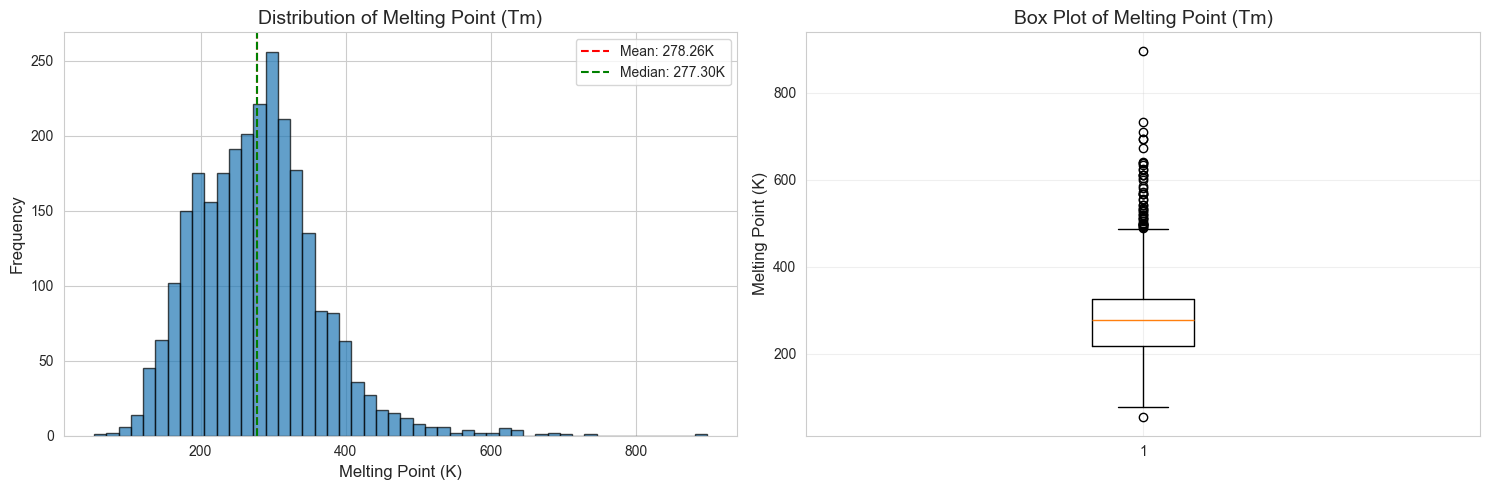

In [7]:
# Visualize target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(train_df['Tm'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Melting Point (K)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Melting Point (Tm)', fontsize=14)
axes[0].axvline(train_df['Tm'].mean(), color='red', linestyle='--', label=f'Mean: {train_df["Tm"].mean():.2f}K')
axes[0].axvline(train_df['Tm'].median(), color='green', linestyle='--', label=f'Median: {train_df["Tm"].median():.2f}K')
axes[0].legend()

# Box plot
axes[1].boxplot(train_df['Tm'], vert=True)
axes[1].set_ylabel('Melting Point (K)', fontsize=12)
axes[1].set_title('Box Plot of Melting Point (Tm)', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
# Analyze feature columns (Group 1-424)
print("=" * 60)
print("FEATURE ANALYSIS (Group 1-424)")
print("=" * 60)

# Get feature columns
feature_cols = [col for col in train_df.columns if col.startswith('Group')]
print(f"\nTotal number of features: {len(feature_cols)}")

# Analyze feature statistics
feature_stats = train_df[feature_cols].describe()
print(f"\nFeature statistics summary:")
print(feature_stats.T[['mean', 'std', 'min', 'max']].head(10))

# Check for sparse features (features with mostly zeros)
non_zero_counts = (train_df[feature_cols] != 0).sum()
sparse_features = non_zero_counts[non_zero_counts < len(train_df) * 0.01]  # Less than 1% non-zero
print(f"\n\nSparse features (< 1% non-zero values): {len(sparse_features)}")
print(f"Dense features (>= 1% non-zero values): {len(feature_cols) - len(sparse_features)}")

FEATURE ANALYSIS (Group 1-424)

Total number of features: 424

Feature statistics summary:
              mean       std  min   max
Group 1   1.020661  1.353640  0.0  16.0
Group 2   1.582269  3.738416  0.0  42.0
Group 3   0.114951  0.425964  0.0   6.0
Group 4   0.036439  0.208307  0.0   3.0
Group 5   0.036814  0.205516  0.0   2.0
Group 6   0.022915  0.164037  0.0   2.0
Group 7   0.013524  0.118732  0.0   2.0
Group 8   0.010143  0.117480  0.0   2.0
Group 9   0.007137  0.092695  0.0   2.0
Group 10  0.000751  0.027405  0.0   1.0


Sparse features (< 1% non-zero values): 347
Dense features (>= 1% non-zero values): 77


## 6. SMILES Analysis

Examine the SMILES molecular structure strings, including uniqueness and length distributions.

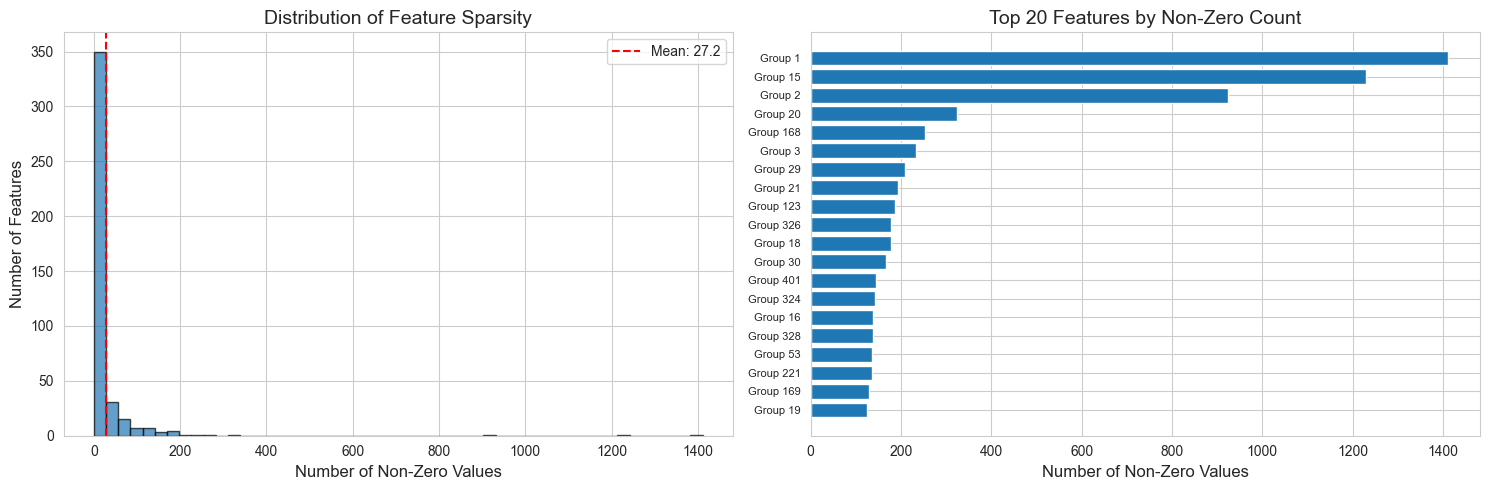

In [9]:
# Visualize feature sparsity
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution of non-zero values per feature
non_zero_counts = (train_df[feature_cols] != 0).sum()
axes[0].hist(non_zero_counts, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Number of Non-Zero Values', fontsize=12)
axes[0].set_ylabel('Number of Features', fontsize=12)
axes[0].set_title('Distribution of Feature Sparsity', fontsize=14)
axes[0].axvline(non_zero_counts.mean(), color='red', linestyle='--', 
                label=f'Mean: {non_zero_counts.mean():.1f}')
axes[0].legend()

# Top 20 features by non-zero count
top_features = non_zero_counts.nlargest(20)
axes[1].barh(range(len(top_features)), top_features.values)
axes[1].set_yticks(range(len(top_features)))
axes[1].set_yticklabels(top_features.index, fontsize=8)
axes[1].set_xlabel('Number of Non-Zero Values', fontsize=12)
axes[1].set_title('Top 20 Features by Non-Zero Count', fontsize=14)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [10]:
# Analyze SMILES column (molecular structure)
print("=" * 60)
print("SMILES (MOLECULAR STRUCTURE) ANALYSIS")
print("=" * 60)

print(f"\nNumber of unique SMILES in training set: {train_df['SMILES'].nunique()}")
print(f"Number of unique SMILES in test set: {test_df['SMILES'].nunique()}")
print(f"Total samples in training set: {len(train_df)}")
print(f"Total samples in test set: {len(test_df)}")

# Check for duplicate SMILES
train_duplicates = train_df['SMILES'].duplicated().sum()
test_duplicates = test_df['SMILES'].duplicated().sum()
print(f"\nDuplicate SMILES in training set: {train_duplicates}")
print(f"Duplicate SMILES in test set: {test_duplicates}")

# SMILES length analysis
train_df['SMILES_length'] = train_df['SMILES'].str.len()
test_df['SMILES_length'] = test_df['SMILES'].str.len()

print(f"\n\nSMILES length statistics (training set):")
print(train_df['SMILES_length'].describe())

print(f"\nSMILES length statistics (test set):")
print(test_df['SMILES_length'].describe())

SMILES (MOLECULAR STRUCTURE) ANALYSIS

Number of unique SMILES in training set: 2662
Number of unique SMILES in test set: 666
Total samples in training set: 2662
Total samples in test set: 666

Duplicate SMILES in training set: 0
Duplicate SMILES in test set: 0


SMILES length statistics (training set):
count    2662.000000
mean       15.655522
std         7.284963
min         2.000000
25%        11.000000
50%        15.000000
75%        19.000000
max        78.000000
Name: SMILES_length, dtype: float64

SMILES length statistics (test set):
count    666.000000
mean      15.506006
std        6.808274
min        2.000000
25%       11.000000
50%       15.000000
75%       19.000000
max       55.000000
Name: SMILES_length, dtype: float64


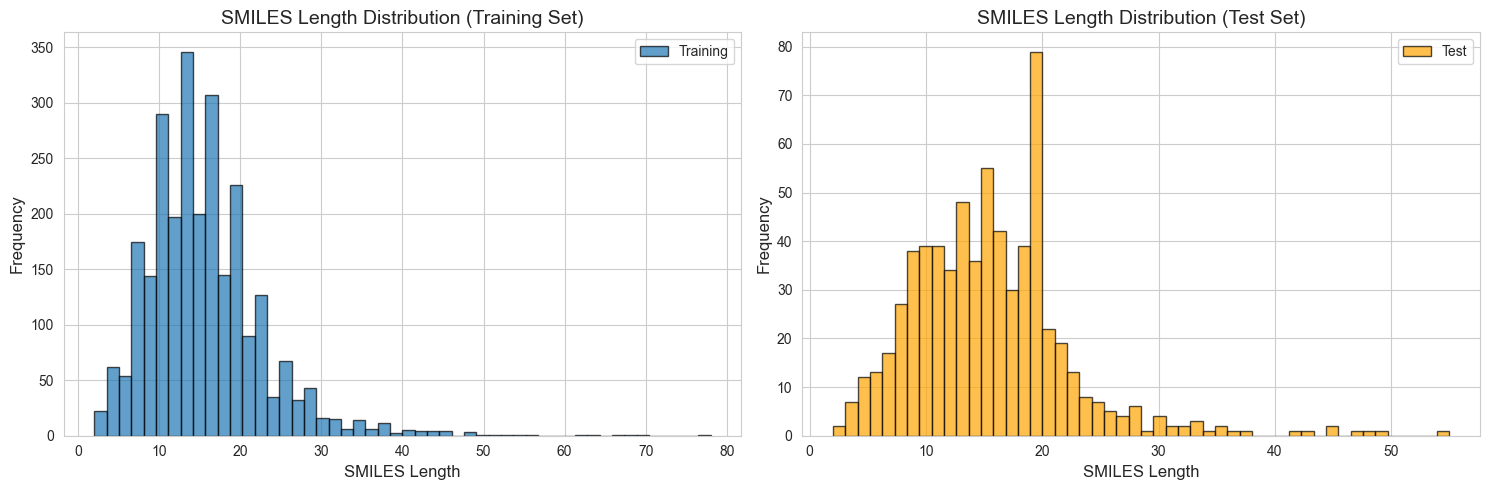

In [11]:
# Visualize SMILES length distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Training set
axes[0].hist(train_df['SMILES_length'], bins=50, edgecolor='black', alpha=0.7, label='Training')
axes[0].set_xlabel('SMILES Length', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('SMILES Length Distribution (Training Set)', fontsize=14)
axes[0].legend()

# Test set
axes[1].hist(test_df['SMILES_length'], bins=50, edgecolor='black', alpha=0.7, color='orange', label='Test')
axes[1].set_xlabel('SMILES Length', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('SMILES Length Distribution (Test Set)', fontsize=14)
axes[1].legend()

plt.tight_layout()
plt.show()

## 7. Feature-Target Correlation Analysis

Examine correlations between features and the target variable to identify the most predictive features.

In [12]:
# Sample some SMILES strings
print("=" * 60)
print("SAMPLE SMILES STRINGS")
print("=" * 60)

print("\nSample SMILES from training set:")
for idx, row in train_df.head(5).iterrows():
    print(f"ID: {row['id']}, SMILES: {row['SMILES']}, Tm: {row['Tm']} K")

SAMPLE SMILES STRINGS

Sample SMILES from training set:
ID: 2175, SMILES: FC1=C(F)C(F)(F)C1(F)F, Tm: 213.15 K
ID: 1222, SMILES: c1ccc2c(c1)ccc3Nc4ccccc4c23, Tm: 407.15 K
ID: 2994, SMILES: CCN1C(C)=Nc2ccccc12, Tm: 324.15 K
ID: 1704, SMILES: CC#CC(=O)O, Tm: 351.15 K
ID: 2526, SMILES: CCCCC(S)C, Tm: 126.15 K


## 8. Linear Regression Model

Build and evaluate a linear regression model to predict melting points from molecular descriptors.

FEATURE-TARGET CORRELATION ANALYSIS

Top 10 features most correlated with Tm (from first 50 features):
Group 15    0.387580
Group 18    0.223551
Group 16    0.223530
Group 17    0.194420
Group 31    0.171773
Group 30    0.162579
Group 19    0.110682
Group 32    0.107192
Group 20    0.099776
Group 2     0.089414
Name: Tm, dtype: float64


Bottom 10 features least correlated with Tm (from first 50 features):
Group 49   -0.060271
Group 50   -0.065249
Group 4    -0.067744
Group 3    -0.104648
Group 7    -0.109899
Group 5    -0.158361
Group 1    -0.186595
Group 12         NaN
Group 28         NaN
Group 46         NaN
Name: Tm, dtype: float64


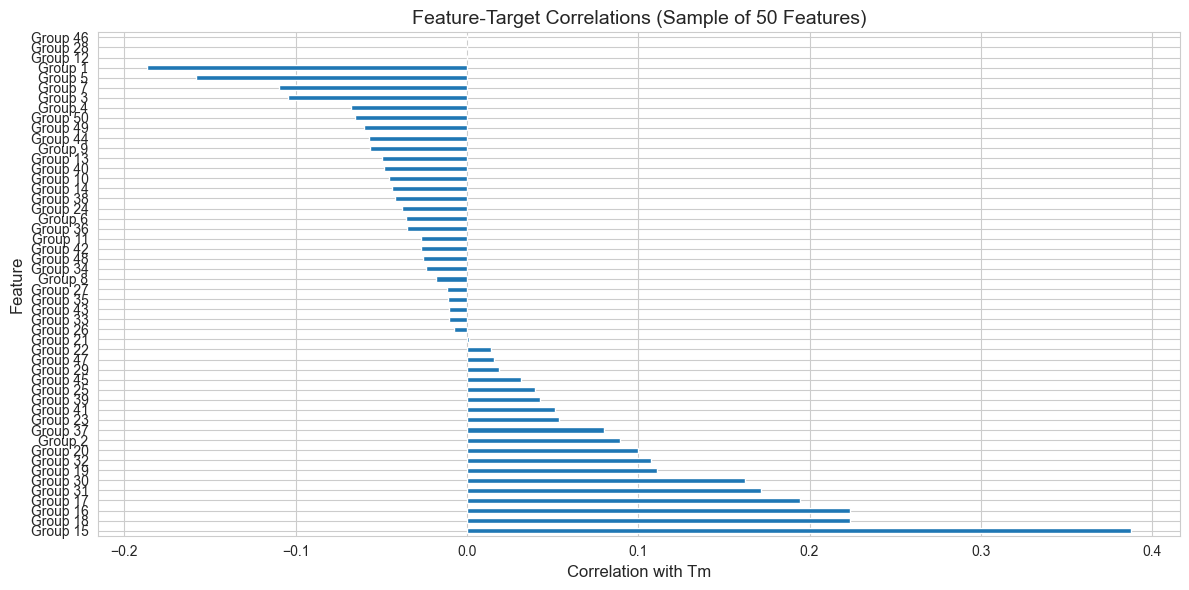

In [13]:
# Correlation analysis between features and target (sample of features)
print("=" * 60)
print("FEATURE-TARGET CORRELATION ANALYSIS")
print("=" * 60)

# Calculate correlations for a sample of features (to avoid memory issues)
sample_features = feature_cols[:50]  # First 50 features
correlations = train_df[sample_features + ['Tm']].corr()['Tm'].drop('Tm').sort_values(ascending=False)

print(f"\nTop 10 features most correlated with Tm (from first 50 features):")
print(correlations.head(10))

print(f"\n\nBottom 10 features least correlated with Tm (from first 50 features):")
print(correlations.tail(10))

# Visualize correlations
plt.figure(figsize=(12, 6))
correlations.plot(kind='barh')
plt.xlabel('Correlation with Tm', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature-Target Correlations (Sample of 50 Features)', fontsize=14)
plt.tight_layout()
plt.show()

### 8.1 Data Preparation

Prepare the data for modeling by selecting features and target variable. The SMILES column is dropped as it's not used as a feature.

In [14]:
# Import sklearn for linear regression and evaluation metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

print("Sklearn imported successfully!")

Sklearn imported successfully!


### 8.2 Train-Validation Split

Split the training data into training and validation sets (80/20) for model evaluation.

In [15]:
# Prepare data for modeling
# Drop SMILES column and id column, keep only feature columns and target
print("=" * 60)
print("DATA PREPARATION FOR MODELING")
print("=" * 60)

# Get feature columns (Group 1-424)
feature_cols = [col for col in train_df.columns if col.startswith('Group')]

# Prepare X (features) and y (target)
X = train_df[feature_cols].copy()
y = train_df['Tm'].copy()

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nFeatures used: {len(feature_cols)}")
print(f"SMILES and id columns dropped: ✓")

DATA PREPARATION FOR MODELING

Feature matrix shape: (2662, 424)
Target vector shape: (2662,)

Features used: 424
SMILES and id columns dropped: ✓


### 8.3 Model Training

Train a linear regression model on the training data for a base model

In [16]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("=" * 60)
print("DATA SPLIT")
print("=" * 60)
print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")

DATA SPLIT

Training set: 2129 samples
Validation set: 533 samples
Features: 424


### 8.4 Model Predictions

Generate predictions for both training and validation sets.

In [17]:
# Train Linear Regression model
print("=" * 60)
print("TRAINING LINEAR REGRESSION MODEL")
print("=" * 60)

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("✓ Model trained successfully!")
print(f"\nModel coefficients shape: {lr_model.coef_.shape}")
print(f"Model intercept: {lr_model.intercept_:.4f}")

TRAINING LINEAR REGRESSION MODEL
✓ Model trained successfully!

Model coefficients shape: (424,)
Model intercept: 133.4238


### 8.5 Model Evaluation

Evaluate model performance using regression metrics: RMSE, MAE, and R² score.

In [27]:
# Make predictions
y_train_pred = lr_model.predict(X_train)
y_val_pred = lr_model.predict(X_val)

print("=" * 60)
print("MODEL PREDICTIONS")
print("=" * 60)
# Check variance, min, and max of validation predictions
val_pred_variance = np.var(y_val_pred)
val_pred_min = np.min(y_val_pred)
val_pred_max = np.max(y_val_pred)

val_variance = np.var(y_val)
val_min = np.min(y_val)
val_max = np.max(y_val)


print(f"\nValidation Predictions Variance: {val_pred_variance:.4f}")
print(f"Validation Predictions Min: {val_pred_min:.4f}")
print(f"Validation Predictions Max: {val_pred_max:.4f}")
print("-" * 60)

print(f"\nValidation Predictions Variance: {val_variance:.4f}")
print(f"Validation Predictions Min: {val_min:.4f}")
print(f"Validation Predictions Max: {val_max:.4f}")


print("✓ Predictions generated for training and validation sets")

MODEL PREDICTIONS

Validation Predictions Variance: 5543.2235
Validation Predictions Min: 131.6485
Validation Predictions Max: 768.1724
------------------------------------------------------------

Validation Predictions Variance: 7497.2689
Validation Predictions Min: 77.1500
Validation Predictions Max: 639.0000
✓ Predictions generated for training and validation sets


### 8.6 Prediction Visualizations

Visualize model predictions vs actual values and analyze residuals.

In [25]:
# Evaluate model performance
print("=" * 60)
print("MODEL EVALUATION METRICS")
print("=" * 60)

# Calculate metrics for training set
train_rmse = math.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for validation set
val_rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("\nTraining Set Performance:")
print(f"  RMSE (Root Mean Squared Error): {train_rmse:.4f} K")
print(f"  MAE (Mean Absolute Error): {train_mae:.4f} K")
print(f"  R² Score: {train_r2:.4f}")

print("\nValidation Set Performance:")
print(f"  RMSE (Root Mean Squared Error): {val_rmse:.4f} K")
print(f"  MAE (Mean Absolute Error): {val_mae:.4f} K")
print(f"  R² Score: {val_r2:.4f}")

print("\n" + "=" * 60)
print("INTERPRETATION:")
print("=" * 60)
print("• RMSE: Lower is better. Average prediction error in Kelvin.")
print("• MAE: Lower is better. Mean absolute prediction error in Kelvin.")
print(f"• R²: Higher is better (max 1.0). {val_r2*100:.2f}% of variance explained.")

MODEL EVALUATION METRICS

Training Set Performance:
  RMSE (Root Mean Squared Error): 45.5486 K
  MAE (Mean Absolute Error): 30.3776 K
  R² Score: 0.7109

Validation Set Performance:
  RMSE (Root Mean Squared Error): 55.2363 K
  MAE (Mean Absolute Error): 36.9047 K
  R² Score: 0.5930

INTERPRETATION:
• RMSE: Lower is better. Average prediction error in Kelvin.
• MAE: Lower is better. Mean absolute prediction error in Kelvin.
• R²: Higher is better (max 1.0). 59.30% of variance explained.


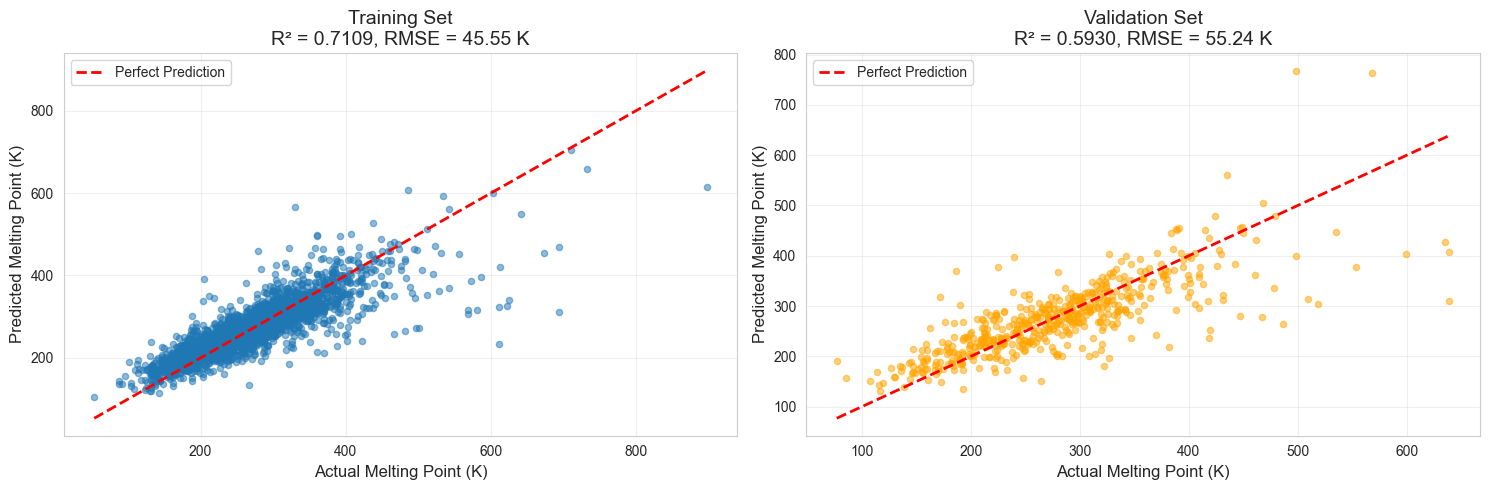

In [26]:
# Visualize predictions vs actual values
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Training set predictions
axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=20)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Melting Point (K)', fontsize=12)
axes[0].set_ylabel('Predicted Melting Point (K)', fontsize=12)
axes[0].set_title(f'Training Set\nR² = {train_r2:.4f}, RMSE = {train_rmse:.2f} K', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Validation set predictions
axes[1].scatter(y_val, y_val_pred, alpha=0.5, s=20, color='orange')
axes[1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Melting Point (K)', fontsize=12)
axes[1].set_ylabel('Predicted Melting Point (K)', fontsize=12)
axes[1].set_title(f'Validation Set\nR² = {val_r2:.4f}, RMSE = {val_rmse:.2f} K', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 8.7 Model Summary

Summary of the linear regression model performance and configuration.

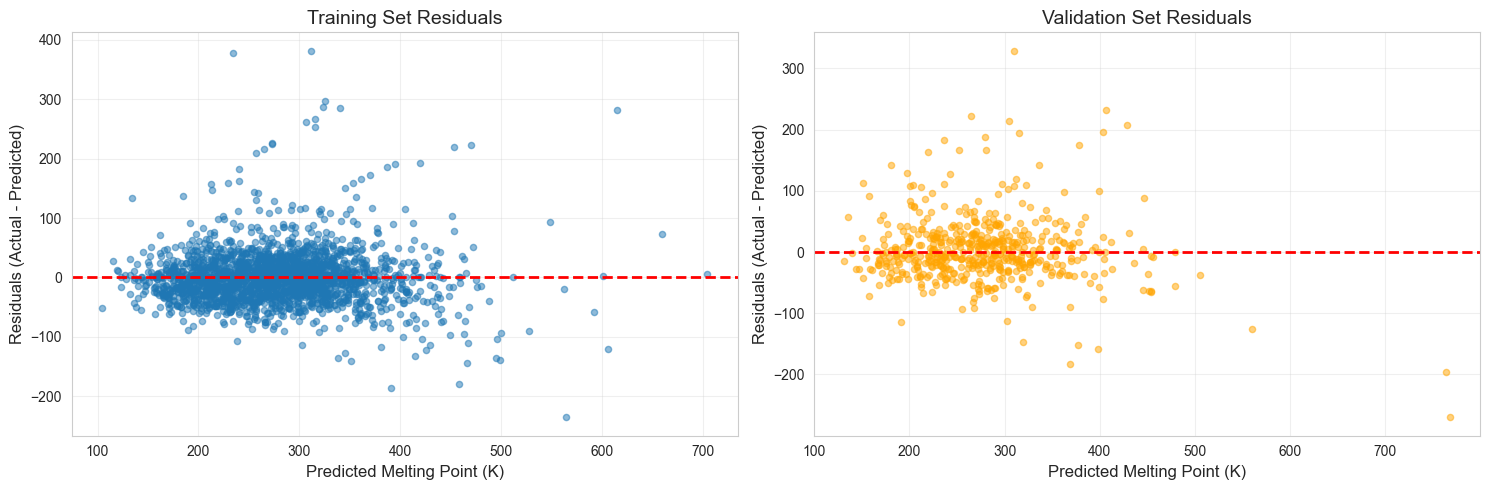

In [21]:
# Residuals analysis
residuals_train = y_train - y_train_pred
residuals_val = y_val - y_val_pred

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Training set residuals
axes[0].scatter(y_train_pred, residuals_train, alpha=0.5, s=20)
axes[0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0].set_xlabel('Predicted Melting Point (K)', fontsize=12)
axes[0].set_ylabel('Residuals (Actual - Predicted)', fontsize=12)
axes[0].set_title('Training Set Residuals', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Validation set residuals
axes[1].scatter(y_val_pred, residuals_val, alpha=0.5, s=20, color='orange')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Melting Point (K)', fontsize=12)
axes[1].set_ylabel('Residuals (Actual - Predicted)', fontsize=12)
axes[1].set_title('Validation Set Residuals', fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. EDA Summary

Summary of key findings from the exploratory data analysis.

In [22]:
# Summary of model performance
print("=" * 60)
print("LINEAR REGRESSION MODEL SUMMARY")
print("=" * 60)
print(f"""
Model: Linear Regression (sklearn)
Features used: {len(feature_cols)} (Group 1-424)
SMILES column: Dropped ✓
ID column: Dropped ✓

Training Performance:
  - RMSE: {train_rmse:.2f} K
  - MAE: {train_mae:.2f} K
  - R²: {train_r2:.4f} ({train_r2*100:.2f}% variance explained)

Validation Performance:
  - RMSE: {val_rmse:.2f} K
  - MAE: {val_mae:.4f} K
  - R²: {val_r2:.4f} ({val_r2*100:.2f}% variance explained)

Note: For regression tasks, we use RMSE, MAE, and R² instead of accuracy.
Accuracy is a metric for classification tasks.
""")

LINEAR REGRESSION MODEL SUMMARY

Model: Linear Regression (sklearn)
Features used: 424 (Group 1-424)
SMILES column: Dropped ✓
ID column: Dropped ✓

Training Performance:
  - RMSE: 45.55 K
  - MAE: 30.38 K
  - R²: 0.7109 (71.09% variance explained)

Validation Performance:
  - RMSE: 55.24 K
  - MAE: 36.9047 K
  - R²: 0.5930 (59.30% variance explained)

Note: For regression tasks, we use RMSE, MAE, and R² instead of accuracy.
Accuracy is a metric for classification tasks.



In [23]:
# Summary statistics
print("=" * 60)
print("SUMMARY")
print("=" * 60)

print(f"""
Dataset Summary:
- Training samples: {len(train_df):,}
- Test samples: {len(test_df):,}
- Total features: {len(feature_cols)}
- Target variable: Tm (Melting Point in Kelvin)
- Target range: {train_df['Tm'].min():.2f} K to {train_df['Tm'].max():.2f} K
- Target mean: {train_df['Tm'].mean():.2f} K
- Target std: {train_df['Tm'].std():.2f} K

Feature Characteristics:
- Sparse features (< 1% non-zero): {len(sparse_features)}
- Dense features (>= 1% non-zero): {len(feature_cols) - len(sparse_features)}
- Average non-zero values per feature: {non_zero_counts.mean():.1f}

Data Quality:
- Missing values in training: {train_df.isnull().sum().sum()}
- Missing values in test: {test_df.isnull().sum().sum()}
- Duplicate SMILES in training: {train_duplicates}
- Duplicate SMILES in test: {test_duplicates}
""")

SUMMARY

Dataset Summary:
- Training samples: 2,662
- Test samples: 666
- Total features: 424
- Target variable: Tm (Melting Point in Kelvin)
- Target range: 53.54 K to 897.15 K
- Target mean: 278.26 K
- Target std: 85.12 K

Feature Characteristics:
- Sparse features (< 1% non-zero): 347
- Dense features (>= 1% non-zero): 77
- Average non-zero values per feature: 27.2

Data Quality:
- Missing values in training: 0
- Missing values in test: 0
- Duplicate SMILES in training: 0
- Duplicate SMILES in test: 0

